In [30]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dataset source: https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)

In [2]:
credit_data = sklearn.datasets.fetch_openml('credit-g')

In [3]:
print(credit_data.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit data**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
      Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. Pe

In [4]:
credit_df = pd.DataFrame(credit_data.data, columns=credit_data.feature_names)
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0


In [5]:
credit_df['GOOD'] = credit_data.target

In [6]:
pd.crosstab(credit_df['checking_status'], credit_data.target, margins=True)

col_0,bad,good,All
checking_status,,,
0.0,135,139,274
1.0,105,164,269
2.0,14,49,63
3.0,46,348,394
All,300,700,1000


In [7]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [22]:
X = pd.get_dummies(credit_df[['checking_status']], columns=['checking_status'], drop_first=True)
X.head()

,checking_status_1.0,checking_status_2.0,checking_status_3.0
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [23]:
credit_df['GOOD'].head()

0    good
1     bad
2    good
3    good
4     bad
Name: GOOD, dtype: object

In [24]:
y = 0+(credit_df['GOOD'] == 'good')

In [25]:
clf = LinearRegression().fit(X, y)

(array([ 60., 105., 135.,   0.,   0.,   0.,   0., 348.,  49., 303.]),
 array([-0.88324873, -0.74565378, -0.60805884, -0.47046389, -0.33286895,
        -0.195274  , -0.05767905,  0.07991589,  0.21751084,  0.35510578,
         0.49270073]),
 <a list of 10 Patch objects>)

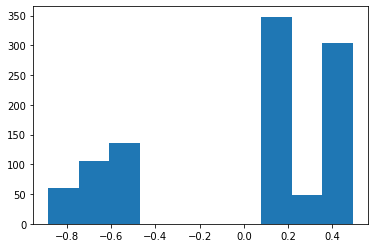

In [26]:
predicted = clf.predict(X)
resid = y - predicted
plt.hist(resid)

(array([274.,   0., 269.,   0.,   0.,   0.,   0.,  63.,   0., 394.]),
 array([0.50729927, 0.54489422, 0.58248916, 0.62008411, 0.65767905,
        0.695274  , 0.73286895, 0.77046389, 0.80805884, 0.84565378,
        0.88324873]),
 <a list of 10 Patch objects>)

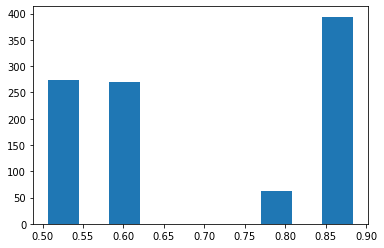

In [28]:
plt.hist(predicted)

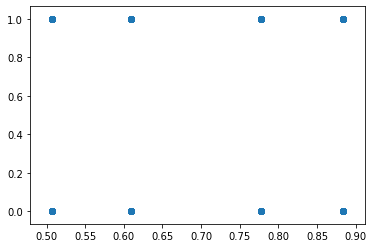

In [29]:
plt.scatter(predicted, y)

In [34]:
predicted_classification = predicted > .9
confusion_matrix(y, predicted_classification)

array([[300,   0],
       [700,   0]])